In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


# Description

Task 8:  Traffic Sign Recognition Description

Description:
 * Dataset (Recommended): GTSRB (Kaggle)
 * Classify traffic signs based on their image using deep learning
 * Preprocess images (resizing, normalization)
 * Train a CNN model to recognize different traffic sign classes
 * Evaluate performance using accuracy and confusion matrix
 
 Tools & Libraries:
 Python
 Keras
 TensorFlow
 OpenCV
 
 Covered Topics:
 Computer vision (CNN)  |  Multi-class classification
 
 Bonus:
 Add data augmentation to improve performance.
Compare custom CNN vs. pre-trained model (e.g., MobileNet)

# Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-09-01 17:23:48.232266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756747428.617326      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756747428.718201      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Load Training Data

In [3]:
train_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"
img_size = 32

In [4]:
images = []
labels = []

for label in os.listdir(train_path):
    class_dir = os.path.join(train_path, label)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(int(label))
            except:
                continue

images = np.array(images)
labels = np.array(labels)

print("Total images:", images.shape)
print("Total labels:", labels.shape)

Total images: (39206, 32, 32, 3)
Total labels: (39206,)


# Preprocess Data

In [6]:
# Normalize images
images = images / 255.0

In [7]:
# One-hot encoding of labels
num_classes = len(np.unique(labels))
labels_cat = to_categorical(labels, num_classes)

In [8]:
# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(
    images, labels_cat, test_size=0.2, random_state=42, stratify=labels
)

# Data Augmentation

In [9]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# Build CNN Model

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1756747898.350139      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756747898.350820      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,627 (920.42 KB)

 Trainable params: 235,627 (920.42 KB)

 Non-trainable params: 0 (0.00 B)

# Train Model 

In [11]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=15
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1756747920.828105     132 service.cc:148] XLA service 0x78aaec0062b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756747920.829755     132 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756747920.829784     132 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756747921.255532     132 cuda_dnn.cc:529] Loaded cuDNN version 90300


  6/491 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.0444 - loss: 3.7547

I0000 00:00:1756747925.260449     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


491/491 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.1777 - loss: 3.0491 - val_accuracy: 0.6268 - val_loss: 1.2097
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.6067 - loss: 1.2254 - val_accuracy: 0.8638 - val_loss: 0.4266
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.7929 - loss: 0.6416 - val_accuracy: 0.9314 - val_loss: 0.2294
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.8659 - loss: 0.4229 - val_accuracy: 0.9514 - val_loss: 0.1564
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9017 - loss: 0.3006 - val_accuracy: 0.9665 - val_loss: 0.1196
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9214 - loss: 0.2535 - val_accuracy: 0.9781 - val_loss: 0.0743
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9383 - loss: 0.2003 - val_accuracy: 0.9802 - val_loss: 0.0682
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9460 - loss: 0.1685 - val_accurac

# Evaluate Model

In [12]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc:.2f}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9948 - loss: 0.0216
Validation Accuracy: 0.99


## Plot accuracy/loss

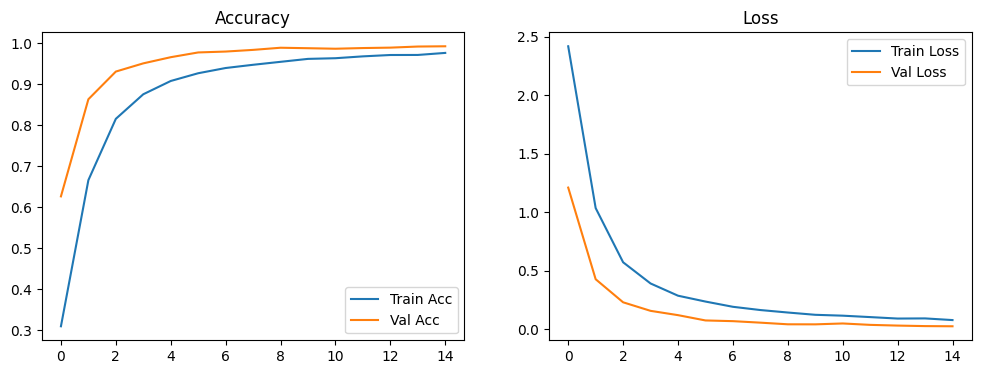

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

## Confusion Matrix

246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


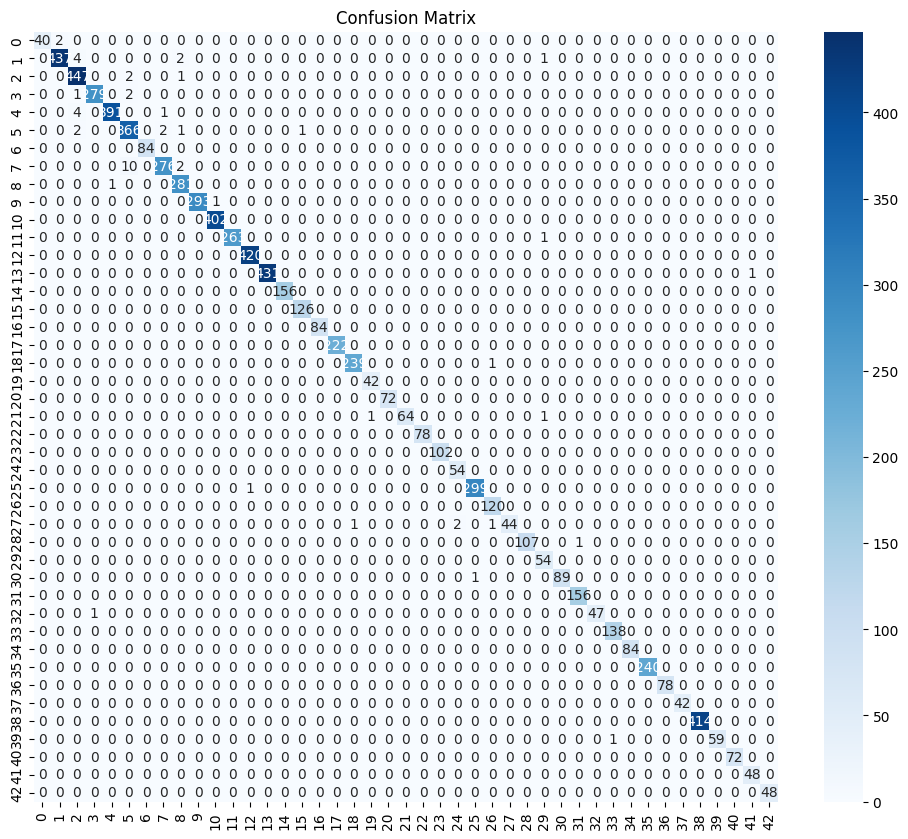

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       1.00      0.98      0.99       444
           2       0.98      0.99      0.98       450
           3       1.00      0.99      0.99       282
           4       1.00      0.99      0.99       396
           5       0.96      0.98      0.97       372
           6       1.00      1.00      1.00        84
           7       0.99      0.96      0.97       288
           8       0.98      1.00      0.99       282
           9       1.00      1.00      1.00       294
          10       1.00      1.00      1.00       402
          11       1.00      1.00      1.00       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       1.00      1.00      1.00       156
          15       0.99      1.00      1.00       126
          16       1.00      1.00      1.00        84
          17       1.00    

In [15]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred_classes))

# Test on Sample Images

In [16]:
test_img_path = "/kaggle/input/gtsrb-german-traffic-sign/Test/02578.png"
test_img = cv2.imread(test_img_path)
test_img_resized = cv2.resize(test_img, (img_size, img_size)) / 255.0
test_img_resized = np.expand_dims(test_img_resized, axis=0)

prediction = model.predict(test_img_resized)
pred_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


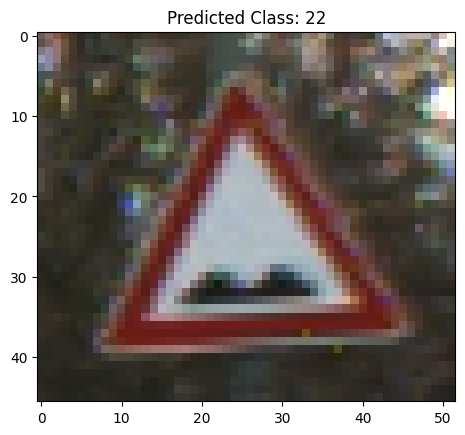

In [17]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {pred_class}")
plt.show()